### Coarse Tip Clearance Test Objective


### Procedure
- Initiate sweep from 30-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Duct Inner Diameter   | Propeller Diameter | Static Tip Clearance | Clearance to Height Ratio (%) | Test Status |
|-                      |-                   |-                     |-                              |-            |
| 137 mm                | 5 in / 127 mm      | 5 mm                 | 71.4 %                        | Waiting     |
| 133 mm                | 5 in / 127 mm      | 3 mm                 | 42.9 %                        | Waiting     |
| 129 mm                | 5 in / 127 mm      | 1 mm                 | 14.3 %                        | Waiting     |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.
- We expect all three 3D printed ducts to consume more power and produce less thrust relative to an equivalent propeller in open air. This is because the tip clearance to blade height ratio is too high for the duct to prevent the formation of blade tip vortices. These vortices are trapped by the duct rather than diffusing into open air, resulting in additional power loss.  

In [59]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [60]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [61]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [9]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [5]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 486,0,0,18.080999,10.240000,0.145400,-0.278200,0.072003,-0.000003

Rx: 5161,0,0,17.325001,10.240000,0.203560,-0.208650,0.069433,0.000000

Rx: 9160,0,0,17.052000,10.240000,0.159940,-0.208650,0.069433,0.000000

Rx: 13167,0,0,16.968000,10.240000,0.189020,-0.236470,0.069433,-0.000003

Rx: 17160,0,0,16.884001,10.240000,0.203560,-0.319930,0.069433,-0.000003

Rx: 21163,0,0,16.863001,10.240000,0.159940,-0.250380,0.069433,0.000000

Rx: 25160,0,0,16.884001,10.240000,0.

In [31]:
test_directory = Path("../test_data/coarse_tip_clearance/")
data_dict = {}

In [63]:
data_dict["test_5in_6blade_open_air_control"] = test_run(
    filename=Path("../test_data/open_air/test_5in_6blade.csv"), plan=plan
)
data_dict["test_5in_6blade_1000um"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um.csv", plan=plan
)
data_dict["test_5in_6blade_1000um_2"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um_2.csv", plan=plan
)
data_dict["test_5in_6blade_open_air_recal_0"] = test_run(
    filename="../test_data/open_air/test_5in_6blade_open_air_recal_0.csv", plan=plan
)
data_dict["test_5in_6blade_open_air_recal_1"] = test_run(
    filename="../test_data/open_air/test_5in_6blade_open_air_recal_1.csv", plan=plan
)

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: Invalid command: 40980,500,0

Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 479,0,0,18.122999,10.240000,0.101780,-0.347750,0.567656,-0.000003

Rx: 5162,0,0,17.283001,10.240000,0.203560,-0.347750,0.567656,-0.000003

Rx: 9161,0,0,17.094000,10.240000,0.189020,-0.264290,0.567656,0.000000

Rx: 13163,0,0,16.947001,10.240000,0.116320,-0.347750,0.567656,0.000000

Rx: 17165,0,0,16.905001,10.240000,0.145400,-0.250380,0.567656,-0.000003

Rx:

### Data Analysis

In [64]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name                        time_ms                                      
test_5in_6blade_open_air_control 0.446                0.0               0.0   
                                 5.174                0.0               0.0   
                                 8.154                0.0               0.0   
                                 11.162               0.0               0.0   
                                 14.154               0.0               0.0   
...                                                   ...               ...   
test_5in_6blade_open_air_recal_1 41965.157         1685.0            1571.0   
                                 41969.161         1628.0            1528.0   
                                 41973.161         1585.0            1485.0   
                                 41977.161         1528.0            1428.0   
                                 41981.150         1457.0            1385.0   

                                            batt_voltage_V  batt_current_A  \
test_name                        time_ms                                     
test_5in_6blade_open_air_control 0.446           18.018000           10.24   
                                 5.174           17.240999           10.24   
                                 8.154           17.052000           10.24   
                                 11.162          16.926001           10.24   
                                 14.154          16.841999           10.24   
...                                                    ...             ...   
test_5in_6blade_open_air_recal_1 41965.157       15.813000           10.24   
                                 41969.161       15.834000           10.24   
                                 41973.161       15.771000           10.24   
                                 41977.161       15.792000           10.24   
                                 41981.150       15.813000           10.24   

                                            top_current_A  bottom_current_A  \
test_name                        time_ms                                      
test_5in_6blade_open_air_control 0.446            0.08724          -0.36166   
                                 5.174            0.14540          -0.29211   
                                 8.154            0.08724          -0.25038   
                                 11.162           0.10178          -0.22256   
                                 14.154           0.15994          -0.20865   
...                                                   ...               ...   
test_5in_6blade_open_air_recal_1 41965.157        0.02908          -0.11128   
                                 41969.161       -0.04362          -0.19474   
                                 41973.161        0.18902          -0.22256   
                                 41977.161        0.07270          -0.20865   
                                 41981.150        0.04362          -0.08346   

                                             thrust_N  torque_N  
test_name                        time_ms                         
test_5in_6blade_open_air_control 0.446      -0.130701 -0.000675  
                                 5.174      -0.130701 -0.000675  
                                 8.154      -0.130701 -0.000675  
                                 11.162     -0.130701 -0.000675  
                                 14.154     -0.130701 -0.000675  
...                                               ...       ...  
test_5in_6blade_open_air_recal_1 41965.157  10.008693  0.000000  
                                 41969.161  10.008693 -0.000003  
                                 41973.161  10.008693 -0.000003  
                                 41977.161  10.008693 -0.000003  
                                 41981.150   3.817779  0.000000  

[55631 rows x 8 columns]

In [65]:
# Select single test to analyze closer
test_data = df_all.loc["test_5in_6blade_1000um"]
test_data

,top_motor_rpm,bottom_motor_rpm,batt_voltage_V,batt_current_A,top_current_A,bottom_current_A,thrust_N,torque_N
time_ms,,,,,,,,
0.476,0.0,0.0,18.186001,10.24,0.14540,-0.20865,2.993658,0.000000
5.162,0.0,0.0,17.304001,10.24,0.18902,-0.29211,2.993658,-0.000003
9.165,0.0,0.0,17.073000,10.24,0.14540,-0.23647,2.993658,-0.000003
13.164,0.0,0.0,16.947001,10.24,0.10178,-0.20865,2.993658,0.000000
17.161,0.0,0.0,16.926001,10.24,0.15994,-0.20865,2.993658,0.000000
...,...,...,...,...,...,...,...,...
41965.157,2328.0,2285.0,16.023001,10.24,0.05816,-0.15301,4.471817,0.000000
41969.161,2214.0,2142.0,16.023001,10.24,0.04362,-0.54249,4.471817,-0.000003
41973.161,2100.0,2042.0,16.023001,10.24,-0.04362,-0.34775,4.471817,-0.000003


In [66]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [67]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm              \
                                                   mean         std   
test_name                        throttle                             
test_5in_6blade_1000um           5             1752.072   12.075183   
                                 10            3138.288   23.438655   
                                 15            4402.032   41.059646   
                                 20            5696.148   50.895101   
                                 25            6804.872   48.733927   
...                                                 ...         ...   
test_5in_6blade_open_air_recal_1 80           15744.428  124.770266   
                                 85           16280.424  139.662086   
                                 90           16790.708  111.833922   
                                 95           17295.376   89.422840   
                                 100          17668.976  100.753703   

                                          bottom_motor_rpm              \
                                                      mean         std   
test_name                        throttle                                
test_5in_6blade_1000um           5                1758.536   28.397224   
                                 10               3154.696   34.902900   
                                 15               4465.256   46.447778   
                                 20               5744.248   33.928973   
                                 25               6960.544   51.791132   
...                                                    ...         ...   
test_5in_6blade_open_air_recal_1 80              15410.296  113.202277   
                                 85              15972.932  125.598580   
                                 90              16511.780   97.866373   
                                 95              16905.196   87.397384   
                                 100             17322.960   85.423293   

                                          batt_voltage_V            \
                                                    mean       std   
test_name                        throttle                            
test_5in_6blade_1000um           5             16.866613  0.019083   
                                 10            16.846452  0.019091   
                                 15            16.823939  0.016413   
                                 20            16.788491  0.024246   
                                 25            16.724316  0.023424   
...                                                  ...       ...   
test_5in_6blade_open_air_recal_1 80            14.844564  0.028282   
                                 85            14.560476  0.026793   
                                 90            14.317632  0.024582   
                                 95            14.041692  0.086008   
                                 100           13.763064  0.016576   

                                          batt_current_A            \
                                                    mean       std   
test_name                        throttle                            
test_5in_6blade_1000um           5              10.24000  0.000000   
                                 10             10.24000  0.000000   
                                 15             10.24000  0.000000   
                                 20             10.24000  0.000000   
                                 25             10.24000  0.000000   
...                                                  ...       ...   
test_5in_6blade_open_air_recal_1 80             40.58944  1.520601   
                                 85             45.68384  1.462242   
                                 90             51.23808  1.336450   
                                 95             56.04864  1.154685   
                                 100            60.87552  0.961167   

                                          top_cu

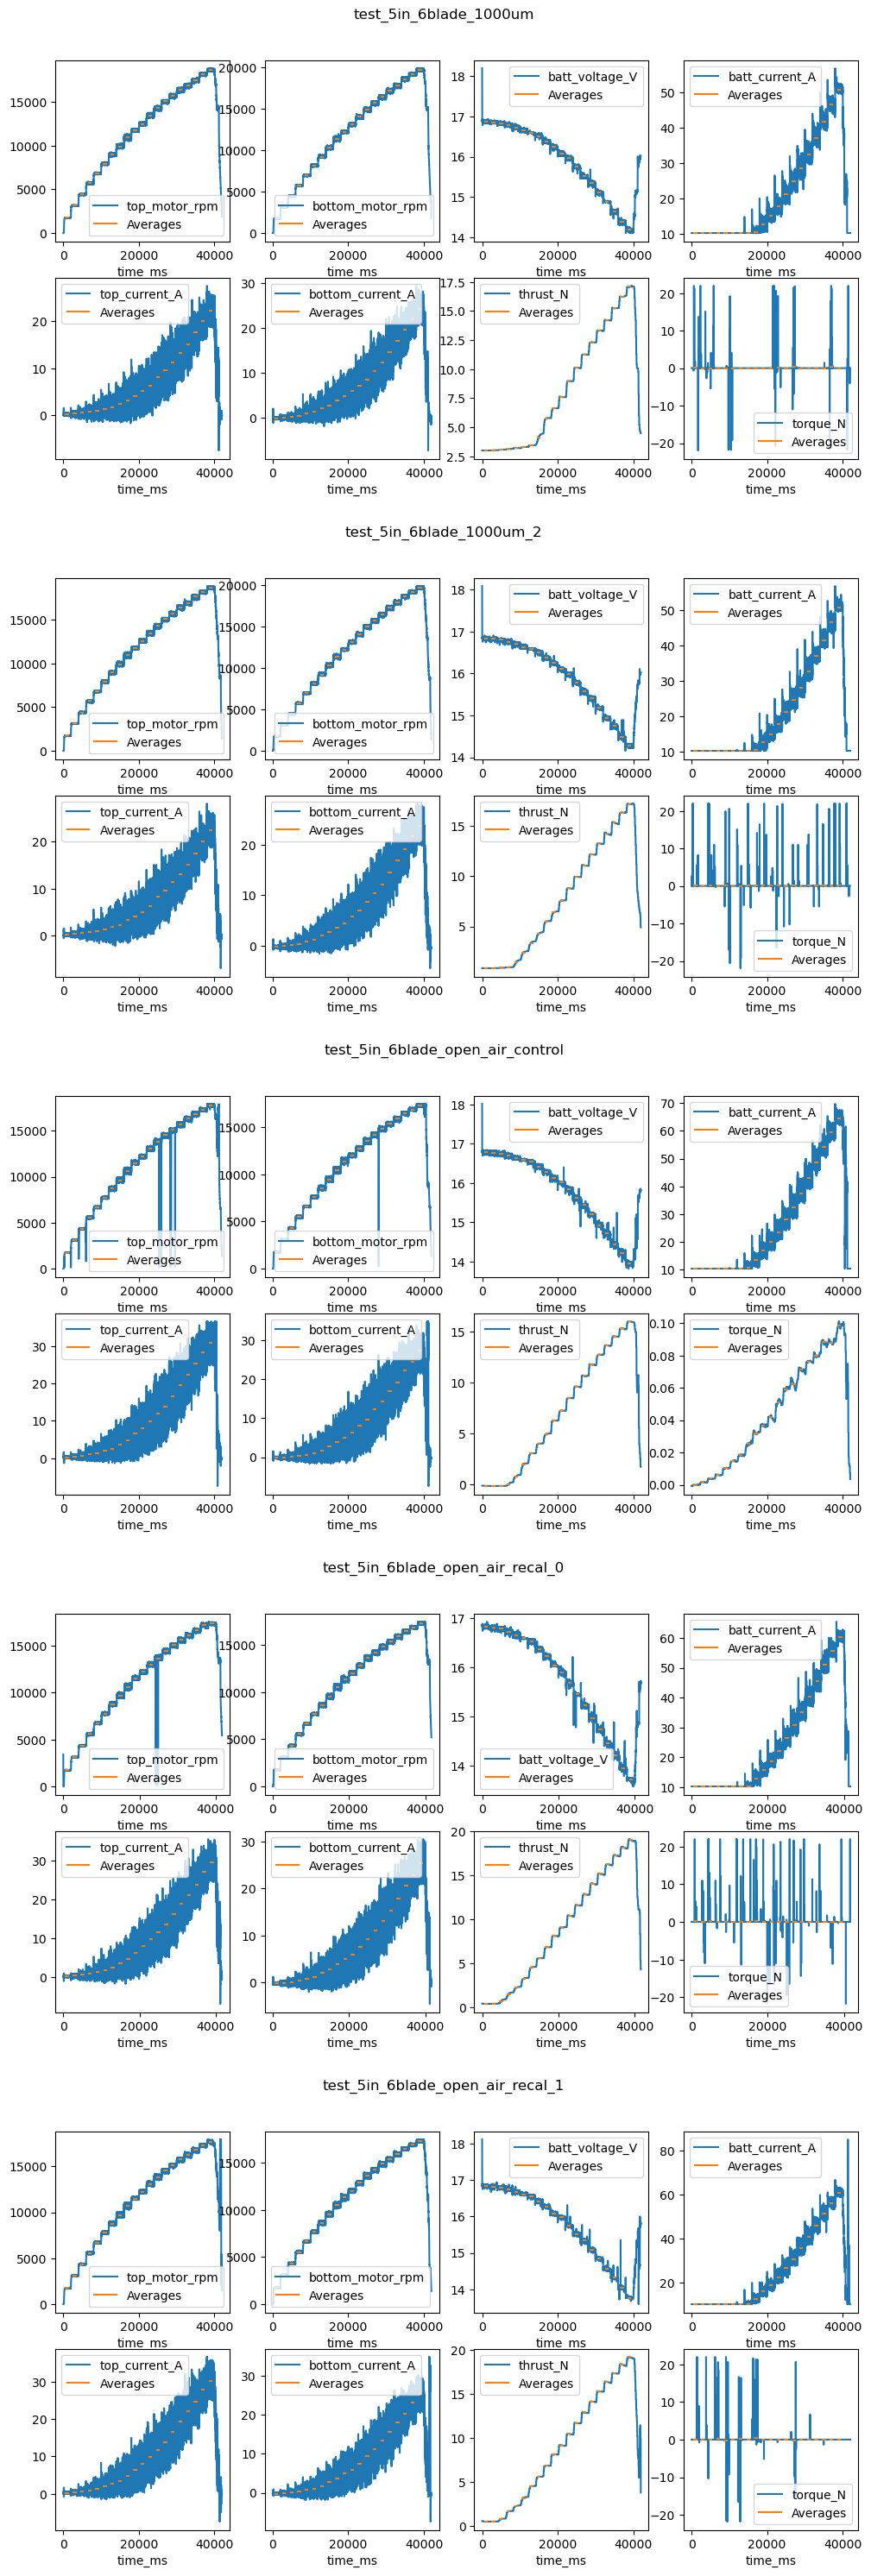

In [68]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [69]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = 5

hover_thrust_g = 750
payload_thrust_g = 1200

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

df_thrust_power = pd.DataFrame(
    {
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": batt_power_rel_err * batt_power_mean,
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

batt_power_rel_err

test_name                         throttle
test_5in_6blade_1000um            5           6.757255
                                  10          1.216252
                                  15          0.598382
                                  20          0.359772
                                  25          0.225680
                                                ...   
test_5in_6blade_open_air_recal_1  80          0.033711
                                  85          0.032323
                                  90          0.031306
                                  95          0.030344
                                  100         0.029724
Name: mean, Length: 100, dtype: float64

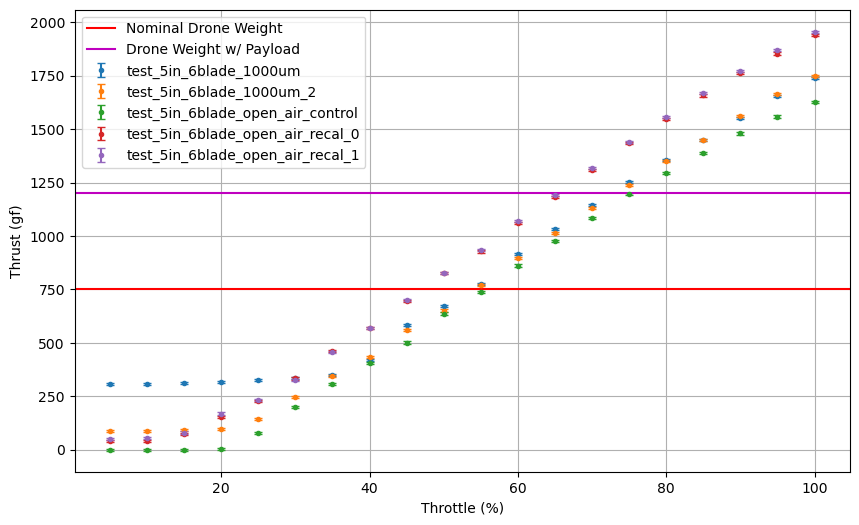

In [70]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
plt.axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
plt.legend()
plt.grid()
plt.show()

In [71]:
# TODO: nominal thrust-weight ratio plot
# thrust_mean_g.iloc[-1] / hover_thrust_g

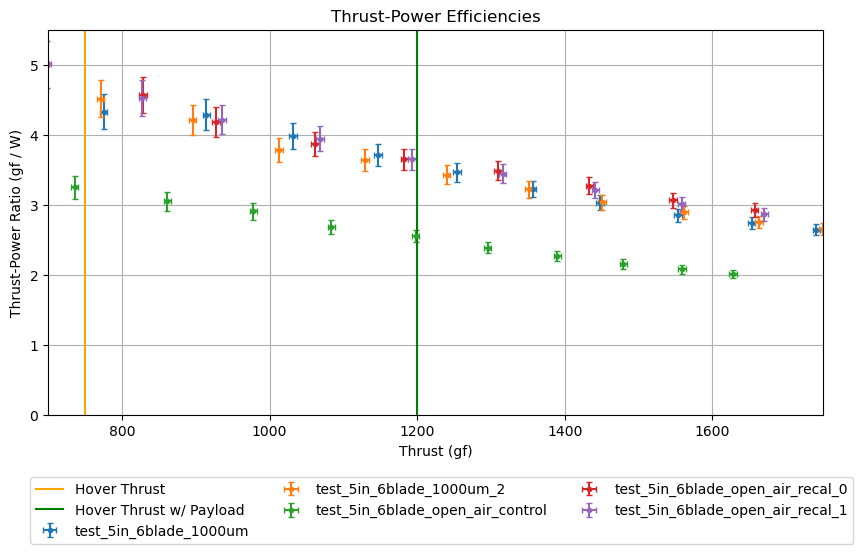

In [74]:
fig = plt.figure(figsize=(10, 5))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x="thrust_mean_g", y="thrust_power_g_W", xerr="thrust_g_err", yerr="thrust_power_err", data=grp, label=n, fmt='o', markersize=3, capsize=2)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.xlim(700, 1750)
plt.ylim(0,5.5)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

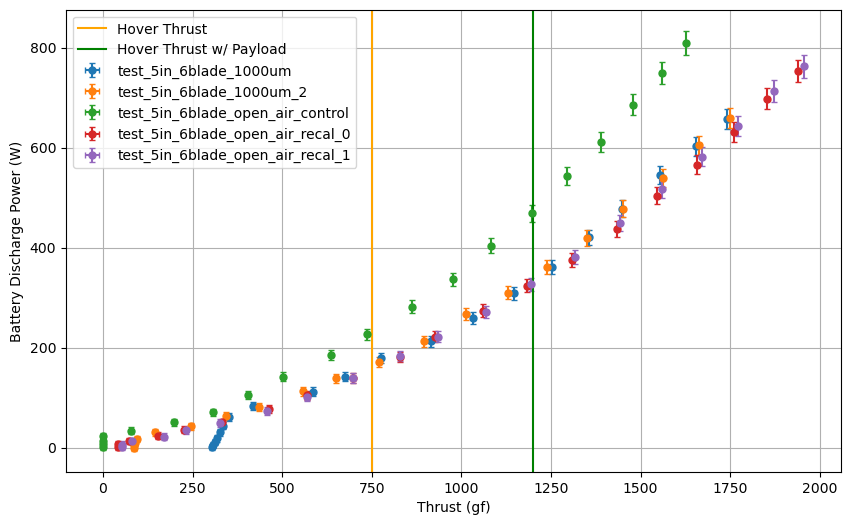

In [75]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    #plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
    plt.errorbar(x="thrust_mean_g", y="batt_power_mean", xerr="thrust_g_err", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=5)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
#plt.xlim(700, 1750)
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [76]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle  batt_power_mean  \
test_name                        thrust_mean_g                               
test_5in_6blade_1000um           750.0          53.762078       169.829458   
                                 1200.0         72.483014       335.068228   
test_5in_6blade_1000um_2         750.0          54.113810       165.104814   
                                 1200.0         73.191222       342.817005   
test_5in_6blade_open_air_control 750.0          55.555152       232.594791   
                                 1200.0         75.104333       470.201963   
test_5in_6blade_open_air_recal_0 750.0          47.023932       156.288065   
                                 1200.0         65.690488       330.665422   
test_5in_6blade_open_air_recal_1 750.0          46.995082       156.784806   
                                 1200.0         65.282939       329.983106   

                                                shunt_power_mean  \
test_name                        thrust_mean_g                     
test_5in_6blade_1000um           750.0                233.567394   
                                 1200.0               410.825844   
test_5in_6blade_1000um_2         750.0                232.815045   
                                 1200.0               413.625631   
test_5in_6blade_open_air_control 750.0                324.368598   
                                 1200.0               571.213074   
test_5in_6blade_open_air_recal_0 750.0                225.900906   
                                 1200.0               417.740891   
test_5in_6blade_open_air_recal_1 750.0                226.467447   
                                 1200.0               416.123302   

                                                thrust_power_g_W  \
test_name                        thrust_mean_g                     
test_5in_6blade_1000um           750.0                  4.432758   
                                 1200.0                 3.591465   
test_5in_6blade_1000um_2         750.0                  4.548154   
                                 1200.0                 3.507636   
test_5in_6blade_open_air_control 750.0                  3.229140   
                                 1200.0                 2.552638   
test_5in_6blade_open_air_recal_0 750.0                  4.827783   
                                 1200.0                 3.632133   
test_5in_6blade_open_air_recal_1 750.0                  4.815463   
                                 1200.0                 3.638336   

                                                shunt_thrust_power_g_W  \
test_name                        thrust_mean_g                           
test_5in_6blade_1000um           750.0                        3.214280   
                                 1200.0                       2.924285   
test_5in_6blade_1000um_2         750.0                        3.220539   
                                 1200.0                       2.902719   
test_5in_6blade_open_air_control 750.0                        2.311931   
                                 1200.0                       2.101010   
test_5in_6blade_open_air_recal_0 750.0                        3.324823   
                                 1200.0                       2.873941   
test_5in_6blade_open_air_recal_1 750.0                        3.320748   
                                 1200.0                       2.884559   

                                                batt_power_err  thrust_g_err  \
test_name                        thrust_mean_g                                 
test_5in_6blade_1000um           750.0                9.917336           5.0   
                                 1200.0              13.464147           5.0   
test_5in_6blade_1000um_2         750.0                9.813448           5.0   
                                 1200.0              13.653882           5.0   
test_5in_6blade_open_air_control 750.0               11.316175           5.0   
                             

In [77]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                         thrust_mean_g
test_5in_6blade_1000um            750.0           0 days 00:08:53.335034214
                                  1200.0          0 days 00:04:30.321064106
test_5in_6blade_1000um_2          750.0           0 days 00:09:08.596966399
                                  1200.0          0 days 00:04:24.210930914
test_5in_6blade_open_air_control  750.0           0 days 00:06:29.415427056
                                  1200.0          0 days 00:03:12.632117835
test_5in_6blade_open_air_recal_0  750.0           0 days 00:09:39.545213961
                                  1200.0          0 days 00:04:33.920385967
test_5in_6blade_open_air_recal_1  750.0           0 days 00:09:37.709039833
                                  1200.0          0 days 00:04:34.486779183
Name: flight_time, dtype: timedelta64[ns]

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

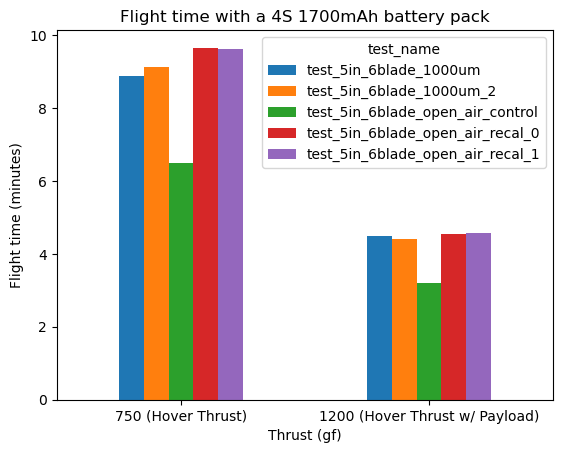

In [78]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
)